# Langchain Models
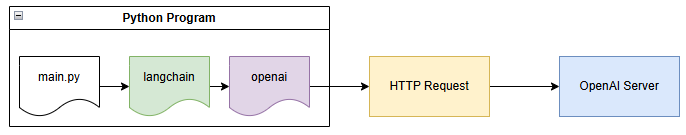

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [2]:
OPENAI_API_KEY=os.environ["OPENAI_API_KEY"]
# print(OPENAI_API_KEY)

In [3]:
from langchain.llms import OpenAI
llm = OpenAI(
    openai_api_key=OPENAI_API_KEY

)
result = llm("Write a very short poem")
print(result)

C:\Users\sachi\AppData\Local\Temp\ipykernel_18456\581258352.py:2: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(
C:\Users\sachi\AppData\Local\Temp\ipykernel_18456\581258352.py:6: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = llm("Write a very short poem")




Roses red,
Violets blue,
Nature's beauty,
Forever true.


# Langchain Prompts

In [14]:
prompt = """
Answer the user's query based on the context below.
If you cannot answer the question using the
provided information answer with "I don't know".

Context: write very short poem on {ask}
"""

ask=input("Give the context : ")
print(llm(prompt))


A poem on {ask}:

Questions and queries,
They never cease.
Curiosity arises,
And we seek release.
With each {ask},
We learn and grow.
For knowledge and understanding,
Is what makes us glow.


## Using langchain prompt templates

In [16]:
from langchain import PromptTemplate

template = """Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: {query}

Answer: """

prompt_template = PromptTemplate(
    input_variables=["query"],
    template=template
)

In [17]:
print(
    prompt_template.format(
        query="Which libraries and model providers offer LLMs?"
    )
)

Answer the question based on the context below. If the
question cannot be answered using the information provided answer
with "I don't know".

Context: Large Language Models (LLMs) are the latest models used in NLP.
Their superior performance over smaller models has made them incredibly
useful for developers building NLP enabled applications. These models
can be accessed via Hugging Face's `transformers` library, via OpenAI
using the `openai` library, and via Cohere using the `cohere` library.

Question: Which libraries and model providers offer LLMs?

Answer: 


In [19]:
print(llm(
    prompt_template.format(
        query="Which libraries and model providers offer LLMs?"
    )
))

Hugging Face, OpenAI, and Cohere offer LLMs.


## Langchain Chains

In [31]:
from langchain.chains import LLMChain

# llm = OpenAI(
#     openai_api_key=api_key
# )

code_prompt = PromptTemplate(
    template="Write a very short {language} function that will {task}",
    input_variables=["language", "task"]
)

code_chain = LLMChain(
    llm=llm,
    prompt=code_prompt
)

result = code_chain({
    "language": "python",
    "task": "return a list of numbers"
})

print(result)

{'language': 'python', 'task': 'return a list of numbers', 'text': '\n\ndef return_list():\n    return [1, 2, 3, 4, 5]'}


In [36]:
print(result["text"])



def return_list():
    return [1, 2, 3, 4, 5]


## Sequential Chain

In [43]:
from langchain.chains import LLMChain, SequentialChain

# llm = OpenAI(
#     openai_api_key=api_key
# )

code_prompt = PromptTemplate(
    template="Write a very short {language} function that will {task}",
    input_variables=["language", "task"]
)

test_prompt = PromptTemplate(
    input_variables=["language", "code"],
    template="Write a test in {language} for the following {language} code:\n{code}"
)

code_chain = LLMChain(
    llm=llm,
    prompt=code_prompt,
    output_key="code"
)

test_chain = LLMChain(
    llm=llm,
    prompt=test_prompt,
    output_key="test"
)

chain = SequentialChain(
    chains=[code_chain, test_chain],
    input_variables=["task", "language"],
    output_variables=["test", "code"]
)

result = chain({
    "language": "python",
    "task": "return a list of numbers"
})

print(result)



{'language': 'python', 'task': 'return a list of numbers', 'test': "\n\nimport unittest\n\nclass TestReturnList(unittest.TestCase):\n    \n    def test_return_list(self):\n        self.assertEqual(return_list(), [1, 2, 3, 4, 5])\n\nif __name__ == '__main__':\n    unittest.main()", 'code': '\n\ndef return_list():\n    return [1, 2, 3, 4, 5]'}


In [44]:
print(result["code"],"\n")
print(result["test"])



def return_list():
    return [1, 2, 3, 4, 5] 



import unittest

class TestReturnList(unittest.TestCase):
    
    def test_return_list(self):
        self.assertEqual(return_list(), [1, 2, 3, 4, 5])

if __name__ == '__main__':
    unittest.main()


## Memory Management

In [ ]:
while True:
    content = input(">> ")

    print(f"You entered: {content}")


In [ ]:
from langchain.prompts import HumanMessagePromptTemplate, ChatPromptTemplate

prompt = ChatPromptTemplate(
    input_variables=["content"],
    messages=[
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

while True:
    content = input(">> ")

    print(f"You entered: {content}")

In [15]:
import keyboard
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain
from langchain.prompts import HumanMessagePromptTemplate, ChatPromptTemplate
from dotenv import load_dotenv

load_dotenv()

chat = ChatOpenAI()

prompt = ChatPromptTemplate(
    input_variables=["content"],
    messages=[
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

chain = LLMChain(
    llm=chat,
    prompt=prompt
)

while True:    
    content = input(">> ")

    if keyboard.is_pressed('esc'):
        print("Escape key pressed. Exiting.")
        break
    
    result = chain({"content": content})
    print(result["text"])


Hello! How can I assist you today?
Hello! How can I assist you today?
I am a language model AI developed by OpenAI. I am here to assist you with any questions or tasks you may have. How can I help you today?
I am a virtual assistant designed to help answer questions and provide assistance to the best of my abilities. How can I assist you today?
Escape key pressed. Exiting.


In [16]:
import keyboard
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
from langchain.prompts import MessagesPlaceholder, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain.memory import ConversationBufferMemory
from dotenv import load_dotenv

load_dotenv()

chat = ChatOpenAI()
memory = ConversationBufferMemory(memory_key="messages", return_messages=True)
prompt = ChatPromptTemplate(
    input_variables=["content", "messages"],
    messages=[
        MessagesPlaceholder(variable_name="messages"),
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

chain = LLMChain(
    llm=chat,
    prompt=prompt,
    memory=memory
)

while True:    
    content = input(">> ")

    if keyboard.is_pressed('esc'):
        print("Escape key pressed. Exiting.")
        break

    result = chain({"content": content})

    print(result["text"])

C:\Users\sachi\AppData\Local\Temp\ipykernel_32196\3881055115.py:11: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key="messages", return_messages=True)


1+1 is equal to 2.
Adding 3 more to 2 results in 5.
Hello! How can I assist you today?
Hello again! How can I assist you today?
The result of adding 3 more to 2 is 5.
Adding 1 more to 5 results in 6.
Adding 2 more to 6 results in 8.
Escape key pressed. Exiting.


### Saving and Extending Conversations

In [19]:
import keyboard
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
from langchain.prompts import MessagesPlaceholder, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain.memory import ConversationBufferMemory, FileChatMessageHistory
from dotenv import load_dotenv

load_dotenv()

chat = ChatOpenAI()
memory = ConversationBufferMemory(
    chat_memory=FileChatMessageHistory("message.json"),
    memory_key="messages", 
    return_messages=True
    )
prompt = ChatPromptTemplate(
    input_variables=["content", "messages"],
    messages=[
        MessagesPlaceholder(variable_name="messages"),
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

chain = LLMChain(
    llm=chat,
    prompt=prompt,
    memory=memory
)

while True:    
    content = input(">> ")

    if keyboard.is_pressed('esc'):
        print("Escape key pressed. Exiting.")
        break

    result = chain({"content": content})

    print(result["text"])

9 + 5 = 14
Escape key pressed. Exiting.


## Conversational Summary memory
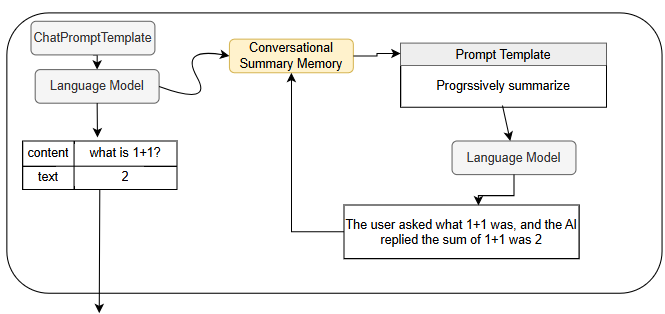

In [5]:
import keyboard
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
from langchain.prompts import MessagesPlaceholder, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain.memory import ConversationSummaryMemory, FileChatMessageHistory
from dotenv import load_dotenv

load_dotenv()

chat = ChatOpenAI(verbose=True)
memory = ConversationSummaryMemory(
    # chat_memory=FileChatMessageHistory("messages.json"),
    memory_key="messages",
    return_messages=True,
    llm=chat
)
prompt = ChatPromptTemplate(
    input_variables=["content", "messages"],
    messages=[
        MessagesPlaceholder(variable_name="messages"),
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

chain = LLMChain(
    llm=chat,
    prompt=prompt,
    memory=memory,
    verbose=True
)

while True:
    content = input(">> ")

    if keyboard.is_pressed('esc'):
        print("Escape key pressed. Exiting.")
        break
    
    result = chain({"content": content})

    print(result["text"])




> Entering new LLMChain chain...
Prompt after formatting:
System: 
Human: what is 1+1?

> Finished chain.
1+1 equals 2.


> Entering new LLMChain chain...
Prompt after formatting:
System: The human asks what 1+1 is, and the AI responds that 1+1 equals 2.
Human: add 3 more

> Finished chain.
If you add 3 more to the result of 1+1, you would get 5.


> Entering new LLMChain chain...
Prompt after formatting:
System: The human asks what 1+1 is, and the AI responds that 1+1 equals 2. When asked to add 3 more, the AI explains that adding 3 to the result of 1+1 would give you 5.
Human: minus 1

> Finished chain.
If you subtract 1 from the result of 1+1, you would get 1.


> Entering new LLMChain chain...
Prompt after formatting:
System: The human asks what 1+1 is, and the AI responds that 1+1 equals 2. When asked to add 3 more, the AI explains that adding 3 to the result of 1+1 would give you 5. When the human asks to subtract 1, the AI clarifies that subtracting 1 from the result of 1+1 wo

## Adding Context

In [6]:

from langchain.document_loaders import TextLoader
from dotenv import load_dotenv

load_dotenv()

loader = TextLoader("facts.txt")
docs = loader.load()

print(docs)


[Document(metadata={'source': 'facts.txt'}, page_content='1. "Dreamt" is the only English word that ends with the letters "mt."\n2. An ostrich\'s eye is bigger than its brain.\n3. Honey is the only natural food that is made without destroying any kind of life.\n4. A snail can sleep for three years.\n5. The longest word in the English language is \'pneumonoultramicroscopicsilicovolcanoconiosis.\'\n6. The elephant is the only mammal that can\'t jump.\n7. The letter \'Q\' is the only letter not appearing in any U.S. state name.\n8. The heart of a shrimp is located in its head.\n9. Australia is the only continent covered by a single country.\n10. The Great Wall of China is approximately 13,171 miles long.\n11. Bananas are berries, but strawberries aren\'t.\n12. The Sphinx of Giza has the body of a lion and the head of a human.\n13. The first computer bug was an actual bug trapped in a computer.\n14. Neil Armstrong was the first man to walk on the moon.\n15. The Eiffel Tower in Paris leans 

### chunking

In [16]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from dotenv import load_dotenv

load_dotenv()

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=200,
    chunk_overlap=0
)

loader = TextLoader("facts.txt")
docs = loader.load_and_split(
    text_splitter=text_splitter
)

for doc in docs:
    print(doc.page_content)
    print("\n")

1. "Dreamt" is the only English word that ends with the letters "mt."
2. An ostrich's eye is bigger than its brain.
3. Honey is the only natural food that is made without destroying any kind of life.


4. A snail can sleep for three years.
5. The longest word in the English language is 'pneumonoultramicroscopicsilicovolcanoconiosis.'
6. The elephant is the only mammal that can't jump.


7. The letter 'Q' is the only letter not appearing in any U.S. state name.
8. The heart of a shrimp is located in its head.
9. Australia is the only continent covered by a single country.


10. The Great Wall of China is approximately 13,171 miles long.
11. Bananas are berries, but strawberries aren't.
12. The Sphinx of Giza has the body of a lion and the head of a human.


13. The first computer bug was an actual bug trapped in a computer.
14. Neil Armstrong was the first man to walk on the moon.


15. The Eiffel Tower in Paris leans slightly in the sun due to thermal expansion.
16. Queen Elizabeth II 

In [17]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

embeddings = OpenAIEmbeddings()

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=200,
    chunk_overlap=0
)

loader = TextLoader("facts.txt")
docs = loader.load_and_split(
    text_splitter=text_splitter
)

for doc in docs:
    print(doc.page_content)
    print("\n")


1. "Dreamt" is the only English word that ends with the letters "mt."
2. An ostrich's eye is bigger than its brain.
3. Honey is the only natural food that is made without destroying any kind of life.


4. A snail can sleep for three years.
5. The longest word in the English language is 'pneumonoultramicroscopicsilicovolcanoconiosis.'
6. The elephant is the only mammal that can't jump.


7. The letter 'Q' is the only letter not appearing in any U.S. state name.
8. The heart of a shrimp is located in its head.
9. Australia is the only continent covered by a single country.


10. The Great Wall of China is approximately 13,171 miles long.
11. Bananas are berries, but strawberries aren't.
12. The Sphinx of Giza has the body of a lion and the head of a human.


13. The first computer bug was an actual bug trapped in a computer.
14. Neil Armstrong was the first man to walk on the moon.


15. The Eiffel Tower in Paris leans slightly in the sun due to thermal expansion.
16. Queen Elizabeth II 

C:\Users\sachi\AppData\Local\Temp\ipykernel_18456\1206157393.py:8: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()


## Custom Document Retrievers

In [1]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores.chroma import Chroma
from dotenv import load_dotenv

load_dotenv()

embeddings = OpenAIEmbeddings()

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=200,
    chunk_overlap=0
)

loader = TextLoader("facts.txt")
docs = loader.load_and_split(
    text_splitter=text_splitter
)

db = Chroma.from_documents(
    docs,
    embedding=embeddings,
    persist_directory="emb"
)

# results = db.similarity_search_with_score(
#     "What is an interesting fact about the English language?"
# )


results = db.similarity_search(
    "What is an interesting fact about the English language?"
)

for result in results:
    print("\n")
    # print(result)
    print(result.page_content)


C:\Users\sachi\AppData\Local\Temp\ipykernel_2956\784736062.py:9: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()




1. "Dreamt" is the only English word that ends with the letters "mt."
2. An ostrich's eye is bigger than its brain.
3. Honey is the only natural food that is made without destroying any kind of life.


4. A snail can sleep for three years.
5. The longest word in the English language is 'pneumonoultramicroscopicsilicovolcanoconiosis.'
6. The elephant is the only mammal that can't jump.


86. Broccoli and cauliflower are the only vegetables that are flowers.
87. The dot over an 'i' or 'j' is called a tittle.
88. A group of owls is called a parliament.


118. The original Star-Spangled Banner was sewn in Baltimore.
119. The average adult spends more time on the toilet than they do exercising.


In [13]:
print(type(results))
print(len(results))

<class 'list'>
4


In [14]:
results[0]

Document(metadata={'source': 'facts.txt'}, page_content='1. "Dreamt" is the only English word that ends with the letters "mt."\n2. An ostrich\'s eye is bigger than its brain.\n3. Honey is the only natural food that is made without destroying any kind of life.')

In [15]:
print(type(results[0]))

<class 'langchain_core.documents.base.Document'>


In [16]:
print(results)

[Document(metadata={'source': 'facts.txt'}, page_content='1. "Dreamt" is the only English word that ends with the letters "mt."\n2. An ostrich\'s eye is bigger than its brain.\n3. Honey is the only natural food that is made without destroying any kind of life.'), Document(metadata={'source': 'facts.txt'}, page_content='1. "Dreamt" is the only English word that ends with the letters "mt."\n2. An ostrich\'s eye is bigger than its brain.\n3. Honey is the only natural food that is made without destroying any kind of life.'), Document(metadata={'source': 'facts.txt'}, page_content='1. "Dreamt" is the only English word that ends with the letters "mt."\n2. An ostrich\'s eye is bigger than its brain.\n3. Honey is the only natural food that is made without destroying any kind of life.'), Document(metadata={'source': 'facts.txt'}, page_content='1. "Dreamt" is the only English word that ends with the letters "mt."\n2. An ostrich\'s eye is bigger than its brain.\n3. Honey is the only natural food 

### Building retrieval chain
Chain type = stuff

In [3]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

chat = ChatOpenAI()
embeddings = OpenAIEmbeddings()
db = Chroma(
    persist_directory="emb",
    embedding_function=embeddings
)
retriever = db.as_retriever()

chain = RetrievalQA.from_chain_type(
    llm=chat,
    retriever=retriever,
    chain_type="stuff"
)

result = chain.run("What is an interesting fact about the English language?")

print(result)

An interesting fact about the English language is that the word "dreamt" is the only English word that ends with the letters "mt."


#### Chain type = map_reduce, 
takes more time

In [8]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from dotenv import load_dotenv
import langchain

load_dotenv()

langchain.debug = True

chat = ChatOpenAI()
embeddings = OpenAIEmbeddings()
db = Chroma(
    persist_directory="emb",
    embedding_function=embeddings
)
retriever = db.as_retriever()

chain = RetrievalQA.from_chain_type(
    llm=chat,
    retriever=retriever,
    chain_type="map_reduce"
    # verborse=True
)

result = chain.run("What is an interesting fact about the English language?")

print(result)

[chain/start] [chain:RetrievalQA] Entering Chain run with input:
{
  "query": "What is an interesting fact about the English language?"
}
[chain/start] [chain:RetrievalQA > chain:MapReduceDocumentsChain] Entering Chain run with input:
[inputs]
[chain/start] [chain:RetrievalQA > chain:MapReduceDocumentsChain > chain:LLMChain] Entering Chain run with input:
{
  "input_list": [
    {
      "context": "1. \"Dreamt\" is the only English word that ends with the letters \"mt.\"\n2. An ostrich's eye is bigger than its brain.\n3. Honey is the only natural food that is made without destroying any kind of life.",
      "question": "What is an interesting fact about the English language?"
    },
    {
      "context": "4. A snail can sleep for three years.\n5. The longest word in the English language is 'pneumonoultramicroscopicsilicovolcanoconiosis.'\n6. The elephant is the only mammal that can't jump.",
      "question": "What is an interesting fact about the English language?"
    },
    {
    

In [9]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from dotenv import load_dotenv
import langchain

load_dotenv()

langchain.debug = True

chat = ChatOpenAI()
embeddings = OpenAIEmbeddings()
db = Chroma(
    persist_directory="emb",
    embedding_function=embeddings
)
retriever = db.as_retriever()

chain = RetrievalQA.from_chain_type(
    llm=chat,
    retriever=retriever,
    chain_type="map_rerank"
    # verborse=True
)

result = chain.run("What is an interesting fact about the English language?")

print(result)

[chain/start] [chain:RetrievalQA] Entering Chain run with input:
{
  "query": "What is an interesting fact about the English language?"
}
[chain/start] [chain:RetrievalQA > chain:MapRerankDocumentsChain] Entering Chain run with input:
[inputs]
[chain/start] [chain:RetrievalQA > chain:MapRerankDocumentsChain > chain:LLMChain] Entering Chain run with input:
{
  "input_list": [
    {
      "context": "1. \"Dreamt\" is the only English word that ends with the letters \"mt.\"\n2. An ostrich's eye is bigger than its brain.\n3. Honey is the only natural food that is made without destroying any kind of life.",
      "question": "What is an interesting fact about the English language?"
    },
    {
      "context": "4. A snail can sleep for three years.\n5. The longest word in the English language is 'pneumonoultramicroscopicsilicovolcanoconiosis.'\n6. The elephant is the only mammal that can't jump.",
      "question": "What is an interesting fact about the English language?"
    },
    {
    

c:\Users\sachi\.conda\envs\compvision\lib\site-packages\langchain\chains\llm.py:370: UserWarning: The apply_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


[llm/end] [chain:RetrievalQA > chain:MapRerankDocumentsChain > chain:LLMChain > llm:ChatOpenAI] [2.70s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "\"Dreamt\" is the only English word that ends with the letters \"mt.\"\nScore: 100",
        "generation_info": {
          "finish_reason": "stop",
          "logprobs": null
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs": {
            "content": "\"Dreamt\" is the only English word that ends with the letters \"mt.\"\nScore: 100",
            "response_metadata": {
              "token_usage": {
                "completion_tokens": 22,
                "prompt_tokens": 359,
                "total_tokens": 381,
                "completion_tokens_details": {
                  "accepted_predict

In [10]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from dotenv import load_dotenv
import langchain

load_dotenv()

langchain.debug = True

chat = ChatOpenAI()
embeddings = OpenAIEmbeddings()
db = Chroma(
    persist_directory="emb",
    embedding_function=embeddings
)
retriever = db.as_retriever()

chain = RetrievalQA.from_chain_type(
    llm=chat,
    retriever=retriever,
    chain_type="refine"
    # verborse=True
)

result = chain.run("What is an interesting fact about the English language?")

print(result)

[chain/start] [chain:RetrievalQA] Entering Chain run with input:
{
  "query": "What is an interesting fact about the English language?"
}
[chain/start] [chain:RetrievalQA > chain:RefineDocumentsChain] Entering Chain run with input:
[inputs]
[chain/start] [chain:RetrievalQA > chain:RefineDocumentsChain > chain:LLMChain] Entering Chain run with input:
{
  "context_str": "1. \"Dreamt\" is the only English word that ends with the letters \"mt.\"\n2. An ostrich's eye is bigger than its brain.\n3. Honey is the only natural food that is made without destroying any kind of life.",
  "question": "What is an interesting fact about the English language?"
}
[llm/start] [chain:RetrievalQA > chain:RefineDocumentsChain > chain:LLMChain > llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "System: Context information is below.\n------------\n1. \"Dreamt\" is the only English word that ends with the letters \"mt.\"\n2. An ostrich's eye is bigger than its brain.\n3. Honey is the only natu

### Removing Duplicate Documents


In [11]:
from langchain.embeddings.base import Embeddings
from langchain.vectorstores import Chroma
from langchain.schema import BaseRetriever


class RedundantFilterRetriever(BaseRetriever):
    embeddings: Embeddings
    chroma: Chroma

    def get_relevant_documents(self, query):
        # calculate embeddings for the 'query' string
        emb = self.embeddings.embed_query(query)

        # take embeddings and feed them into that
        # max_marginal_relevance_search_by_vector
        return self.chroma.max_marginal_relevance_search_by_vector(
            embedding=emb,
            lambda_mult=0.8
        )

    async def aget_relevant_documents(self):
        return []

C:\Users\sachi\AppData\Local\Temp\ipykernel_2956\2353000910.py:6: DeprecationWarning: Retrievers must implement abstract `_get_relevant_documents` method instead of `get_relevant_documents`
  class RedundantFilterRetriever(BaseRetriever):
C:\Users\sachi\AppData\Local\Temp\ipykernel_2956\2353000910.py:6: DeprecationWarning: Retrievers must implement abstract `_aget_relevant_documents` method instead of `aget_relevant_documents`
  class RedundantFilterRetriever(BaseRetriever):


In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from dotenv import load_dotenv

load_dotenv()

embeddings = OpenAIEmbeddings()

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=200,
    chunk_overlap=0
)

loader = TextLoader("facts.txt")
docs = loader.load_and_split(
    text_splitter=text_splitter
)

db = Chroma.from_documents(
    docs,
    embedding=embeddings,
    persist_directory="emb"
)

results = db.similarity_search(
    "What is an interesting fact about the English language?"
)

for result in results:
    print("\n")
    print(result.page_content)